<a href="https://colab.research.google.com/github/taylorp-j/NGG6050/blob/main/9_16_24_Error_Types%2C_P_Values%2C_FPR%2C_Power_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes.
#Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session. To obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import pearsonr
from statsmodels.stats.power import TTestIndPower

In [15]:
#Parameters
N = 1000
num_simulations = 1000

#Create List
correlation_coefficients = []

for _ in range(num_simulations):
    # Generate data
    pupil_diameter = np.random.normal(loc=0, scale=1, size=N)  # Gaussian distribution
    lc_activity = np.random.poisson(lam=5, size=N)  # Poisson distribution

    # Compute the Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(pupil_diameter, lc_activity)

    # Store the result
    correlation_coefficients.append(correlation_coefficient)

# Convert the list to a numpy array for convenience
correlation_coefficients = np.array(correlation_coefficients)

# Print statistics about the null distribution
print("Mean correlation coefficient:", np.mean(correlation_coefficients))
print("Standard deviation of correlation coefficient:", np.std(correlation_coefficients))

Mean correlation coefficient: 0.000114831067128739
Standard deviation of correlation coefficient: 0.03200472509148604


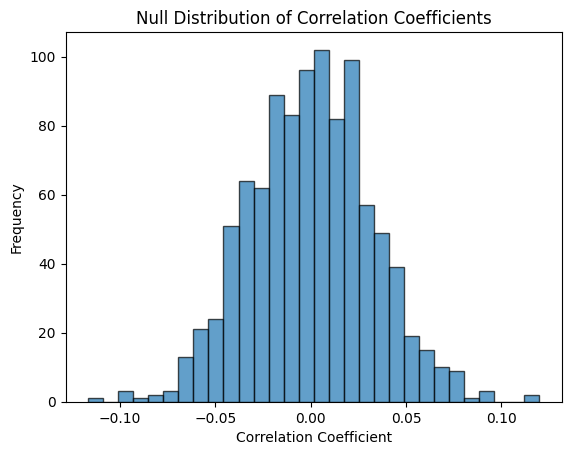

In [16]:
#Null Distribution
plt.hist(correlation_coefficients, bins=30, edgecolor='k', alpha=0.7)
plt.title('Null Distribution of Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.

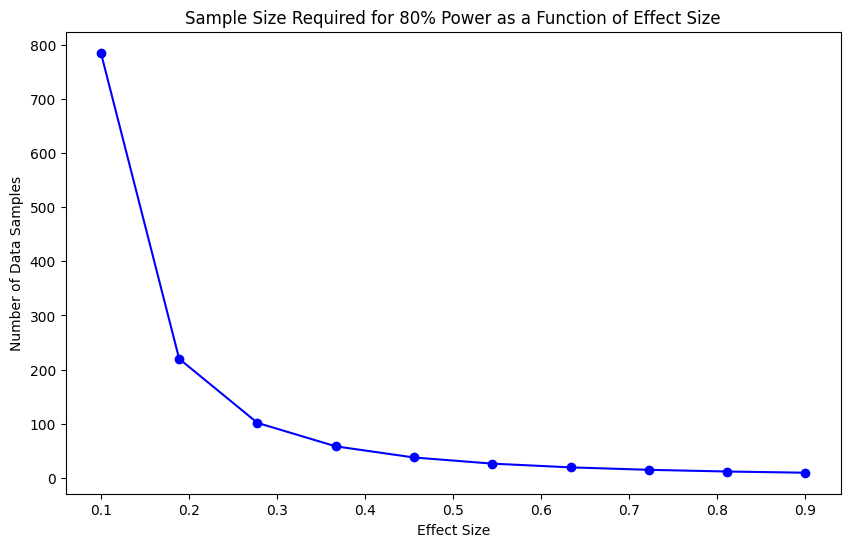

In [18]:
from scipy.stats import norm

# Parameters
alpha = 0.05  # Significance level
power = 0.80  # Desired power

# Z-scores for the significance level and power
z_alpha = norm.ppf(1 - alpha / 2)  # Z-score for the significance level (two-tailed)
z_beta = norm.ppf(power)  # Z-score for the desired power

# Effect sizes (correlation coefficients)
effect_sizes = np.linspace(0.1, 0.9, 10)  # Correlation coefficients from 0.1 to 0.9

# Calculate sample sizes
sample_sizes = [(z_alpha + z_beta)**2 / r**2 for r in effect_sizes]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, sample_sizes, marker='o', linestyle='-', color='b')
plt.title('Sample Size Required for 80% Power as a Function of Effect Size')
plt.xlabel('Effect Size')
plt.ylabel('Number of Data Samples')
plt.show()